<a href="https://colab.research.google.com/github/NitinAgrawalgit/MLProject/blob/main/myMLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
backup=car.copy()

In [7]:
car=car[car['year'].str.isnumeric()]

In [8]:
car['year']=car['year'].astype(int)

In [9]:
car=car[car['Price']!='Ask For Price']

In [10]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [11]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [12]:
car=car[car['kms_driven'].str.isnumeric()]

In [13]:
car['kms_driven']=car['kms_driven'].astype(int)

In [14]:
car=car[~car['fuel_type'].isna()]

In [15]:
car.shape

(816, 6)

In [16]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [17]:
car=car.reset_index(drop=True)

In [18]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [19]:
car.to_csv('Cleaned_Car_data.csv')

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [21]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [22]:
car=car[car['Price']<6000000]

In [23]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [24]:
import seaborn as sns

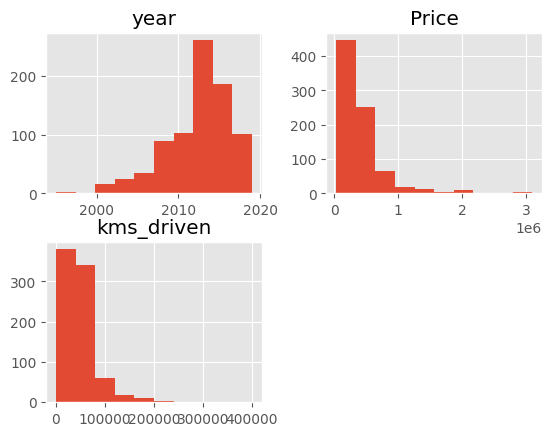

In [25]:
from matplotlib import pyplot
car.hist()
pyplot.show()

In [26]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [27]:
y.shape

(815,)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [31]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [32]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [33]:
lr=LinearRegression()

In [34]:
pipe=make_pipeline(column_trans,lr)

In [35]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [36]:
y_pred=pipe.predict(X_test)

In [37]:
y_pred

array([ 1.05323894e+05,  5.14654966e+05,  3.32766657e+05,  2.99340513e+05,
        2.30750700e+05,  2.51329569e+05,  2.85749333e+05,  3.48389248e+05,
        3.10498587e+05,  1.47161112e+05, -4.40596542e+03,  3.86301899e+05,
        1.10630778e+06,  2.97458603e+05,  2.96060922e+05,  2.92539216e+05,
        3.85176871e+05,  2.54668631e+05,  8.75438834e+04,  6.13974453e+05,
        2.64763442e+05,  8.57770948e+04,  3.74617323e+05,  7.90269371e+03,
        2.83175583e+05,  3.33083928e+05,  3.12421524e+05,  4.28335944e+05,
        4.04943387e+04,  2.70046196e+05,  5.08803207e+05,  1.95397701e+05,
        1.54851840e+05,  3.16950514e+05,  3.96427878e+05,  5.15362389e+05,
        6.72132693e+05,  7.81732766e+05,  1.71679536e+05,  3.87285222e+05,
        1.11173822e+06, -1.54065273e+05,  5.09213156e+05,  5.19102660e+05,
        2.90676683e+05,  5.52897000e+05,  7.03291833e+05,  4.61396625e+05,
        6.32668441e+05,  6.82639858e+05,  7.73145109e+04,  2.33676672e+05,
        1.47458372e+05,  

In [49]:
print("Regressor slope:  %2.f  "%( lr.coef_[0]))
print("Regressor intercept:%2.f  "% lr.intercept_)

Regressor slope:  341122  
Regressor intercept:-65054809  


In [50]:
from sklearn import metrics
print("MAE %2.f" %(metrics.mean_absolute_error(y_test,y_pred)))

MAE 124340


In [51]:
from sklearn import metrics
print("RMSE %2.f" %(np.sqrt(metrics.mean_absolute_error(y_test,y_pred))))

RMSE 353


In [55]:
print('Train Score: %f' %(pipe.score(X_train, y_train))) 
print('Test Score: %f' % (pipe.score(X_test, y_test)) )

Train Score: 0.779655
Test Score: 0.641490


In [56]:
import pickle

In [57]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [58]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([446171.61135677])

In [59]:
model = pickle.load(open('/content/LinearRegressionModel.pkl', 'rb'))

In [60]:
output = model.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))
print(output)

[446171.61135677]
